<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lesson 07- Experiments and Hypothesis Testing

Adapted from Alexander Egorenkov

---

In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# This allows plots to appear directly in the notebook.
%matplotlib inline
plt.style.use('ggplot') 

#### Code-Along: Bring in Today's Data

In [9]:
!curl -O http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4756  100  4756    0     0   8477      0 --:--:-- --:--:-- --:--:--  8477


In [10]:
!head Advertising.csv

In [3]:
# Read data into a DataFrame.

# We use index_col to tell Pandas that the first column in the data has row labels.
data = pd.read_csv('./Advertising.csv', index_col=0)
data.head() 

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 4)

#### Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this new device. The company might ask you the following: "On the basis of this data, how should we spend our advertising money in the future?"

In [5]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
data.corrwith(data.sales)

TV           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
dtype: float64

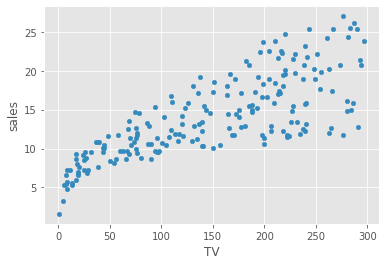

In [7]:
data.plot(x='TV', y='sales',kind='scatter');

<a id="how-do-we-determine-if-something-is-causal"></a>
### How Do We Determine if Something is Causal?

Considering causal criteria is one approach to assessing causal relationships.

However, it’s hard to define universal causal criteria.

One attempt that's commonly used in the medical field is based on work by Bradford Hill.


He developed a list of “tests” that an analysis must pass in order to indicate a causal relationship:


- Strength of association
- Consistency
- Specificity
- Temporality
- Biological gradient
- Plausibility
- Coherence
- Experiment
- Analogy


**Strength (effect size)**: A small association does not mean that there is not a causal effect, although the larger the association, the more likely the effect is to be causal.

**Consistency (reproducibility)**: Consistent findings observed by different persons in different places with different samples strengthens the likelihood of an effect.

**Specificity**: Causation is likely if there is a very specific population at a specific site and a disease with no other likely explanation. The more specific an association between a factor and an effect, the greater the probability of a causal relationship.

**Temporality**: The effect has to occur after the cause (and, if there is an expected delay between the cause and expected effect, then the effect must occur after that delay).

**Plausibility**: A plausible mechanism between cause and effect is helpful (but Hill noted that knowledge of the mechanism is limited by current knowledge).

**Experiment**: "Occasionally it is possible to appeal to experimental evidence."

### What Is a "Confounder"?

Let’s say we performed an analysis to understand what causes lung cancer. 

We find that people who carry cigarette lighters are 2.4 times more likely to contract lung cancer than people who don’t carry lighters.

Does this mean that the lighters are causing cancer?


As we've noted before, if lighters and cancer are both caused by smoking, there will be a correlation between lighters and cancer. This isn't the only possible diagram, but it makes the most sense.
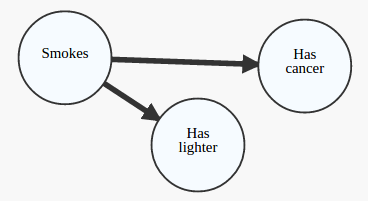

<a id="controlled-experiments"></a>
### Controlled Experiments

- The most foolproof way to measure an effect is to control all of the confounders and directly intervene and control our variable of interest. 
- This way we know that any correlation we find is not because of the confounders but instead because of the variable we control. 
- This also means that all the effects we see are due to the variable we control.

<a id="when-is-it-ok-to-rely-on-association"></a>
### When Is it OK to Rely on Association?

- **When any intervention that arises from your model affects only the outcome variable.**
    - In other words, you only need to predict Y.
    - This works because we only need to observe explanatory variables and implicitly know the confounders' effect.
    - Decision-making and intervention based on your model are hidden dangers that can shift confounders.
    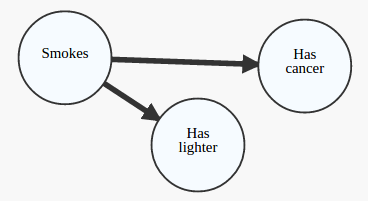



### Code-Along: Explore the Associations in the Advertising Data

#### Visualize the relationship between the features and the response using scatterplots.

- Below, we filled in how to make a scatterplot for the columns `sales` vs `TV`. 
- Using this as an example, can you also make scatterplots for `sales` vs `radio` and `sales` vs `newspaper`?
- `axs[0]` is the first coordinate grid, `axs[1]` is the second coordinate grid, etc.

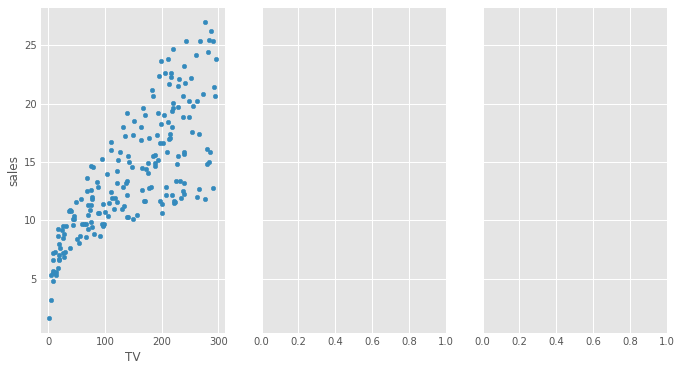

In [23]:
# Visualize the relationship between the features and the response using scatterplots:
fig, axs = plt.subplots(1, 3, sharey=True)

data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(10, 6));

#### Can we say this a causal relationship?

In [19]:
# Answer:

#### What other questions might we want to know about this data?

In [20]:
# Answer:

### Section Summary

1) **It's important to have deep subject area knowledge.** You'll develop this over time and it will help you move through your analysis in a logical manner. However, keep in mind that you can show a strong association and still be wrong.

2) **There is a distinction between causation and correlation.** In our smoking example, it's relatively obvious that there's a flaw in our logic; however, this won't always be so readily apparent.

3) **Good data are essential.** Throughout this course we will be developing your data intuition so you can spot gaps and bias more readily. You'll also be introduced to tools that can help. However, your analysis is only as good as your understanding of the problem and the data.

<a id="sampling-bias"></a>
## Sampling Bias
---

**Sampling bias** occurs when a sample is collected in such a way that some members of the intended population are more or less likely to be included than others.

This can happen when a sample is taken non-randomly — either implicitly or explicitly.

When we have non-random sampling that results in sampling bias, it can affect the inferences or results of our analyses. We must be sure not to attribute our results to the process we observe when they could actually be because of non-random sampling.

Conceptually, this is straightforward: When we have sampling bias, we aren't measuring what we think we are measuring.

<a id="forms-of-sampling-bias"></a>
### Examples of Sampling Bias

- **Pre-screening:** Purposely restricting the sample to a specific group or region.
    - This typically happens when people try to study priority areas to save costs and assume priority areas are the same as random areas.
- **Self-selection:** When someone has the ability to non-randomly decide what is included in a sample.
    - This typically happens in surveys and polls but can also be an issue with other kinds of reporting.
- **Survivorship bias:** When we select only surviving subjects in a sample over time.
    - This might happen when we only look at existing customers and assume they have the same characteristics as new customers.

<a id="problems-from-sampling-bias"></a>
### Problems That Arise From Sampling Bias
- The bias could cause the correlation instead of our variable of interest.
- The conclusion is not valid when making prediction.
